### EDA on streaming services
Description in readme.md file

### Importing packages

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

###  Loading data
Dataset has 8 columns:
<ul>
<li> ID - movies identificator</li>
<li> Title of the movie</li>
<li> Year of release</li>
<li>Age Category shows target group of movies:
<ul>
<li> 0 - Movie for all </li>
<li> 7 - Movie for childrens 7+ </li>
<li> 13 - Movie for teenagers 13+ </li>
<li> 18 - Movie for adults 18+ </li> </ul>
 </li> 
<li>Reviews on Rotten Tomatoes from 0 to 100 </li>
<li> Avability on Netflix, Hulu, Disney+, Amazon Prime Video</li>

</ul>

In [98]:
dataset = pd.read_csv("streaming_services_data.csv") # read the csv file
dataset.drop(["Unnamed: 0", "Type","ID"], axis=1, inplace=True) # delete unnecessary columns
print(dataset.head(4)) # print first 4 rows of the dataset
print(dataset.info()) # print information about the dataset



                                      Title  Year  Age Rotten Tomatoes  \
0                              The Irishman  2019  18+          98/100   
1                                    Dangal  2016   7+          97/100   
2  David Attenborough: A Life on Our Planet  2020   7+          95/100   
3         Lagaan: Once Upon a Time in India  2001   7+          94/100   

   Netflix  Hulu  Prime Video  Disney+  
0        1     0            0        0  
1        1     0            0        0  
2        1     0            0        0  
3        1     0            0        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            9515 non-null   object
 1   Year             9515 non-null   int64 
 2   Age              5338 non-null   object
 3   Rotten Tomatoes  9508 non-null   object
 4   Netflix          9515 non-null   int64 
 5 

### Null values
Almost all columns don't have null values, except Age column, there we have 4177 null values, which is 43.9 % percent of data in this column. Rest of columns have 0 null values.

In [99]:
print("Null values in the dataset:")
print(dataset.isna().sum()) # print the number of null values in the dataset
print("Percentage of null values in the dataset:", dataset.isna().sum()/len(dataset)*100)

Null values in the dataset:
Title                 0
Year                  0
Age                4177
Rotten Tomatoes       7
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
dtype: int64
Percentage of null values in the dataset: Title               0.000000
Year                0.000000
Age                43.899107
Rotten Tomatoes     0.073568
Netflix             0.000000
Hulu                0.000000
Prime Video         0.000000
Disney+             0.000000
dtype: float64


### Adding columns, transforming data
To make analyse easier I transformed ***Rotten Tomatoes*** column by striping value "/100" from each record and changed it to int. Missing values set to the average of the review. <br> Added new column ***streaming_service_type***, which stores informations about streaming services. This column contains str values (each analysed streaming service). <br>
Changed values in **Age** column to int values (described above). Null values replaced with 0. <br>

In [172]:
dataset["Rotten Tomatoes"]=dataset["Rotten Tomatoes"].str.strip("/100") # remove  /100 sign from the Rotten Tomatoes column
reviews_value = [review for review in dataset["Rotten Tomatoes"]] # create a list of the values of the Rotten Tomatoes column
reviews_int = []
for reviews in reviews_value:
    try:
        reviews_int.append(int(reviews))
    except ValueError:
        reviews_int.append(0) # if the value is not an integer, set it to 0
dataset["Rotten Tomatoes"].fillna(int(np.mean(reviews_int)), inplace=True) # fill the null values with the mean of the non-null values

dataset["Age"] = dataset["Age"].str.strip("+") # remove + sign from the Age column
dataset["Age"] = [ 0 if age_int == "all" else  age_int for age_int in dataset["Age"]] # convert the all values to 0 in the Age column
dataset["Age"].fillna(0, inplace=True) # fill the null values in the Age column with 0
dataset["Age"].astype(int) # convert the Age column to integer

#create a new column with streaming services names
streaming_service_type = []
for i in range(len(dataset)):
     if dataset.loc[i,"Netflix"] == 1:
         streaming_service_type.append("Netflix")
     elif dataset.loc[i,"Hulu"] == 1:
         streaming_service_type.append("Hulu")
     elif dataset.loc[i,"Prime Video"] == 1:
         streaming_service_type.append("Prime Video")
     else:
         streaming_service_type.append("Disney+")
dataset["streaming_service_type"] = streaming_service_type # create a new column with the streaming services names



dataset.to_csv("streaming_services_data_cleaned.csv") # save the cleaned dataset to a csv file
print("The cleaned dataset has been saved to a csv file")



The cleaned dataset has been saved to a csv file


### Opening cleaned version of dataset

In [173]:
dataset_cleaned = pd.read_csv("streaming_services_data_cleaned.csv") # read the cleaned dataset
dataset_cleaned.dtypes

Unnamed: 0                  int64
Title                      object
Year                        int64
Age                         int64
Rotten Tomatoes           float64
Netflix                     int64
Hulu                        int64
Prime Video                 int64
Disney+                     int64
streaming_service_type     object
dtype: object

### Boxplot 
Visually shows the distribution of numerical data, based on a five number summary: <ul> 
<li> minimum </li>
<li> First Quartile Q1 </li>
<li> median (Second Quartile Q2) </li>
<li> Third Quartile Q3 </li>
<li>maximum </li>
<li> IQR - Interquartile range; the distance between Q3 and Q1 </li>
</ul>
 Distribution of the age column show as, that Netflix, Hulu and Amazon Prime Video have simillar distribution (summaries), but in Disney+ case, we can notice that more movies are  intended for childrens (0 or 7+ age group )


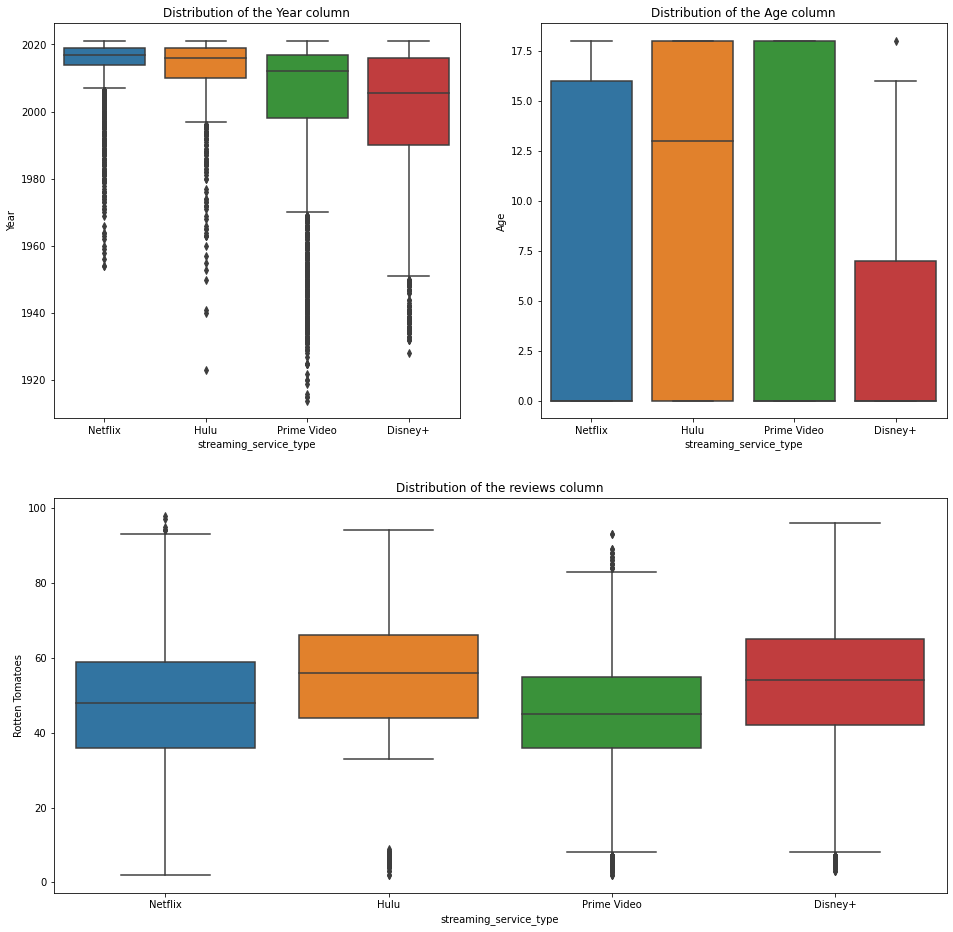

,Year,Age,Rotten Tomatoes
count,9515.000000,9515.000000,9500.000000
mean,2007.422386,6.935155,43.923368
std,19.130367,7.757323,22.781653
min,1914.000000,0.000000,2.000000
25%,2006.000000,0.000000,37.000000
50%,2015.000000,0.000000,48.000000
75%,2018.000000,16.000000,59.000000
max,2021.000000,18.000000,98.000000


In [223]:
plt.figure(figsize=(16,16)) # create a figure with a size of 10x6 inches
plt.subplot(2,2,1)
plt.title("Distribution of the Year column") # add a subtitle to the figure
sns.boxplot(x="streaming_service_type", y="Year", data=dataset_cleaned) # create a boxplot of the Age column by streaming services type
plt.subplot(2,2,2)
plt.title("Distribution of the Age column") # add a subtitle to the figure
sns.boxplot(x="streaming_service_type", y="Age", data=dataset_cleaned) # create a boxplot of the Age column by streaming services type
plt.subplot(2,1,2)
plt.title("Distribution of the reviews column") # add a subtitle to the figure
sns.boxplot(x="streaming_service_type", y="Rotten Tomatoes", data=dataset_cleaned) # create a boxplot of the Rotten Tomatoes column by streaming services type
plt.show()

#numerical information about the dataset
dataset_cleaned[["Year","Age","Rotten Tomatoes"]].describe()